In [202]:
! pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [203]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [204]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import dateparser
from scipy.stats import gaussian_kde
import math

In [205]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly

In [244]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [207]:
# DATASET
df = pd.read_csv('/content/scoobydoo.csv')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     603 non-null    int64  
 1   series_name               603 non-null    object 
 2   network                   603 non-null    object 
 3   season                    603 non-null    object 
 4   title                     603 non-null    object 
 5   imdb                      588 non-null    float64
 6   engagement                588 non-null    float64
 7   date_aired                603 non-null    object 
 8   run_time                  603 non-null    int64  
 9   format                    603 non-null    object 
 10  monster_name              516 non-null    object 
 11  monster_gender            516 non-null    object 
 12  monster_type              516 non-null    object 
 13  monster_subtype           515 non-null    object 
 14  monster_sp

In [209]:
df.head(5)

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


In [210]:
# CHARACTER ROLES (heatmaps & bar polar chart)

In [211]:
persy = ['fred', 'daphnie', 'velma', 'shaggy', 'scooby']

In [212]:
formap = {}

for i in range(6):
    period = df.loc[(i * 100): ((i * 100) + 99)]
    formap['period' + str(i + 1)] = {}
    for pers in persy:
        formap['period' + str(i + 1)][pers] = period['caught_' + pers].sum()

In [213]:
table = pd.DataFrame(formap)

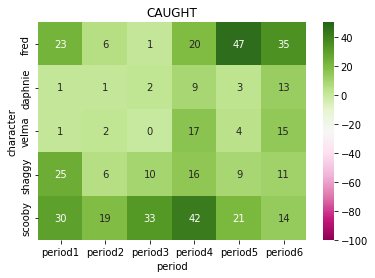

In [214]:
sns.heatmap(
    table,
    annot=True,
    vmin=-100,
    vmax=50,
    cmap='PiYG'
)
plt.title('CAUGHT')
plt.xlabel('period')
plt.ylabel('character')
plt.show()

In [215]:
rose = []

for pers in persy:
    rose.append(df['caught_' + pers].sum())

In [216]:
formap1 = {}

for i in range(6):
    period = df.loc[(i * 100): ((i * 100) + 99)]
    formap1['period' + str(i + 1)] = {}
    for pers in persy:
        formap1['period' + str(i + 1)][pers] = period['captured_' + pers].sum()

In [217]:
table1 = pd.DataFrame(formap1)

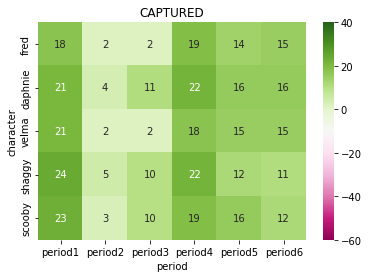

In [218]:
sns.heatmap(
    table1,
    annot=True,
    vmin=-60,
    vmax=40,
    cmap='PiYG'
)
plt.title('CAPTURED')
plt.xlabel('period')
plt.ylabel('character')
plt.show()

In [219]:
rose1 = []

for pers in persy:
    rose1.append(df['captured_' + pers].sum())

In [220]:
formap2 = {}

for i in range(6):
    period = df.loc[(i * 100): ((i * 100) + 99)]
    formap2['period' + str(i + 1)] = {}
    for pers in persy:
        formap2['period' + str(i + 1)][pers] = period['unmask_' + pers].sum()

In [221]:
table2 = pd.DataFrame(formap2)

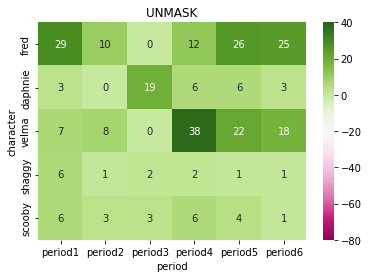

In [222]:
sns.heatmap(
    table2,
    annot=True,
    vmin=-80,
    vmax=40,
    cmap='PiYG'
)
plt.title('UNMASK')
plt.xlabel('period')
plt.ylabel('character')
plt.show()

In [223]:
rose2 = []

for pers in persy:
    rose2.append(df['unmask_' + pers].sum())

In [224]:
for_Rose = pd.DataFrame()
for_Rose['pers'] = persy
for_Rose['caught'] = rose
for_Rose['captured'] = rose1
for_Rose['unmask'] = rose2
for_Rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pers      5 non-null      object
 1   caught    5 non-null      int64 
 2   captured  5 non-null      int64 
 3   unmask    5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [225]:
fR = pd.DataFrame(columns=['pers', 'type', 'num'])
for i in for_Rose.itertuples():
    fR = fR.append(pd.DataFrame([[i.pers, 'caught', i.caught]], columns=['pers', 'type', 'num']), ignore_index=True)
    fR = fR.append(pd.DataFrame([[i.pers, 'captured', i.captured]], columns=['pers', 'type', 'num']), ignore_index=True)
    fR = fR.append(pd.DataFrame([[i.pers, 'unmask', i.unmask]], columns=['pers', 'type', 'num']), ignore_index=True)
fR

,pers,type,num
0,fred,caught,132
1,fred,captured,71
2,fred,unmask,102
3,daphnie,caught,29
4,daphnie,captured,91
5,daphnie,unmask,37
6,velma,caught,41
7,velma,captured,74
8,velma,unmask,94
9,shaggy,caught,77


In [226]:
fig = px.line_polar(fR, r='num', theta='pers', color='type', line_close=True,
                    template="plotly_dark")
fig.show()

In [227]:
# GLASSES

In [228]:
glasses = {}

for i in range(6):
    period = df.loc[(i * 100): ((i * 100) + 99)]
    glasses['period' + str(i + 1)] = period['my_glasses'].sum()

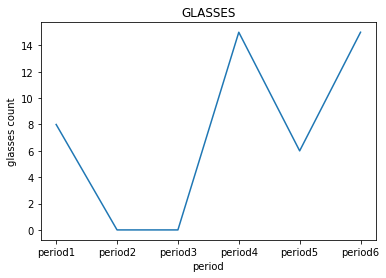

In [229]:
plt.plot(list(glasses.keys()), list(glasses.values()))
plt.title('GLASSES')
plt.xlabel('period')
plt.ylabel('glasses count')
plt.show()

In [230]:
df.astype({'my_glasses': 'float'})

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Scooby-Doo and Guess Who?,Boomerang,2,The Dreaded Remake of Jekyll & Hyde!,NaN,NaN,2020-10-01,22,TV Series,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
599,600,Warner Home Video,Warner Home Video,Movie,"Happy Halloween, Scooby-Doo!",6.3,978.0,2020-10-06,76,Movie,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
600,601,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! The Sword and the Scoob,6.2,422.0,2020-02-23,77,Movie,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
601,602,Scooby-Doo and Guess Who?,Boomerang,2,Dark Diner of Route 66!,NaN,NaN,2021-02-25,22,TV Series,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker


In [231]:
df_year = df.copy()
df_year['date_year'] = df['date_aired'].apply(lambda x: dateparser.parse(x).year)

In [232]:
year_glasses = df_year[['date_year', 'title', 'my_glasses', 'engagement']].groupby('date_year').agg({'my_glasses': 'sum', 'title': 'count', 'engagement': 'mean'})

In [233]:
year_glasses

,my_glasses,title,engagement
date_year,,,
1969,4.0,15,394.666667
1970,2.0,10,318.200000
1972,1.0,16,116.062500
1973,0.0,8,89.000000
1976,1.0,19,78.473684
1977,0.0,40,32.100000
1978,0.0,32,51.906250
1979,0.0,16,114.500000
1980,0.0,25,33.920000


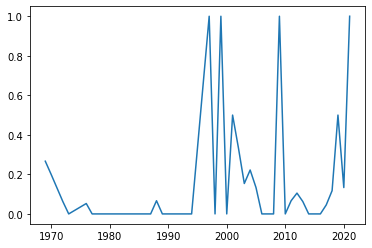

In [234]:
plt.plot(year_glasses.index, year_glasses['my_glasses']/year_glasses['title'])

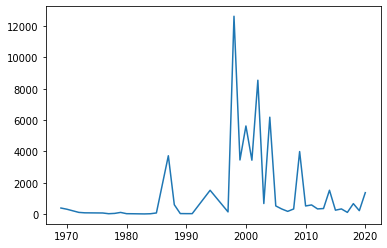

In [235]:
plt.plot(year_glasses.index, year_glasses['engagement'])

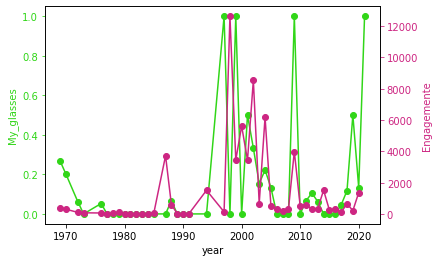

In [236]:
fig, ax = plt.subplots()
axes = [ax, ax.twinx()]

# left ax
ldata = year_glasses['my_glasses']/year_glasses['title']
axes[0].plot(ldata, marker='o', color='#31d618')
axes[0].set_ylabel('My_glasses', color='#31d618')
axes[0].tick_params(axis='y', colors='#31d618')
axes[0].set_xlabel('year')

# right ax
ldata = year_glasses['engagement']
axes[1].plot(ldata, marker='o', color='#cd2682')
axes[1].set_ylabel('Engagemente', color='#cd2682')
axes[1].tick_params(axis='y', colors='#cd2682')
axes[1].set_xlabel('year')

plt.show()

In [237]:
ny = year_glasses[['engagement']]
ny['my_glasses'] = year_glasses['my_glasses']/year_glasses['title']
ny.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [238]:
fit = np.polyfit(ny['my_glasses'], ny['engagement'], 1)

In [239]:
fit

array([2042.02813997, 1079.38372772])

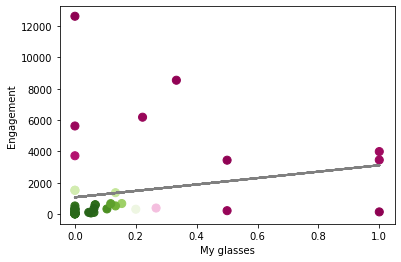

In [240]:
fig, ax = plt.subplots()
ax.set_ylabel('Engagement')
ax.set_xlabel('My glasses')
from scipy.stats import gaussian_kde
dicksity = np.vstack([ny['my_glasses'], ny['engagement']])
z = gaussian_kde(dicksity)(dicksity)
ax.scatter(ny['my_glasses'], ny['engagement'], c=z, cmap='PiYG', s=65)
plt.plot(ny['my_glasses'], fit[0] * ny['my_glasses'] + fit[1], color='grey', linewidth=2)

{'snack_fred': 18, 'snack_daphnie': 49, 'snack_velma': 29, 'snack_shaggy': 43, 'snack_scooby': 12}


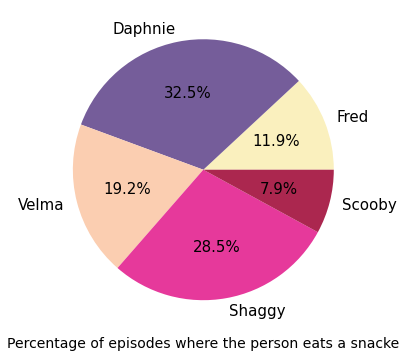

In [241]:
# SCOOBY SNACK
snack_persons = ['snack_fred', 'snack_daphnie','snack_velma', 'snack_shaggy', 'snack_scooby']
snack_di = {}
for person in snack_persons:
    snack_di[person] = df[person].sum()
print(snack_di)

fig, ax = plt.subplots(figsize=(8, 6))
textprops = {"fontsize":15}
plt.pie(list(snack_di.values()), colors = ['#FAF0BE', '#755D9A', '#FBCEB1', '#E6399B', '#AB274F'], labels=['Fred', 'Daphnie', 'Velma', 'Shaggy', 'Scooby'], autopct='%.1f%%', textprops=textprops)
plt.xlabel('Percentage of episodes where the person eats a snacke', fontsize=14)
plt.show()

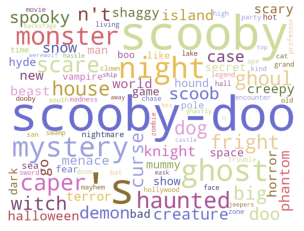

In [245]:
# TITLE WORDCLOUDS
lemmatizer = WordNetLemmatizer()
stopwords = list(stopwords.words('english'))

titles = list(df['title'])
titles_di = {}
for title in titles:
    for word in list(word_tokenize(title)):
        word = word.lower()
        if (word not in string.punctuation) and (word not in stopwords):
            word = lemmatizer.lemmatize(word)
            if word not in list(titles_di.keys()):
                titles_di[word] = 1
            else:
                titles_di[word] += 1

freq_titles_di = {}
for word in titles_di:
    if titles_di[word] > 1:
        freq_titles_di[word] = titles_di[word]

wc = WordCloud(background_color="white", max_words = 100, height=600, width=800, colormap='tab20b').generate_from_frequencies(freq_titles_di)
plt.imshow(wc)
plt.axis("off")
plt.show()

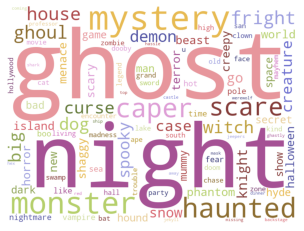

In [246]:
#without 'scooby' and local stopwords
stopwords.extend(['scooby', 'doo', 'scooby-doo', "'s", "n't", 'scoob'])

titles = list(df['title'])
titles_di = {}
for title in titles:
    for word in list(word_tokenize(title)):
        word = word.lower()
        if (word not in string.punctuation) and (word not in stopwords):
            word = lemmatizer.lemmatize(word)
            if word not in list(titles_di.keys()):
                titles_di[word] = 1
            else:
                titles_di[word] += 1

wc = WordCloud(background_color="white", max_words = 100, height=600, width=800, colormap='tab20b').generate_from_frequencies(titles_di)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [255]:
# MAP

dfmap = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

df_mystates = pd.DataFrame(df.groupby('setting_country_state')['index'].count())
df_mystates = df_mystates.rename(columns={'setting_country_state':'state', 'index':'number'})

states_list = dfmap['state']
states_di = {}
for state in states_list:
    if state in df_mystates.index:
        states_di[state] = df_mystates.loc[state]['number']
    else:
        states_di[state] = 0
print(df_mystates)

states_numbers = np.array(list(states_di.values()))
items = []
for item in list(states_di.values()):
    item = math.log(item + 30)
    items.append(item)

fig = go.Figure(data=go.Choropleth(
    locations=dfmap['code'],
    z=items,
    locationmode="USA-states",
    colorscale='teal',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="log(number of episodes+30)"
))
fig.update_layout(
    title_text = 'Number of Scooby-Doo episodes among the USA states',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

                       number
setting_country_state        
Africa                      4
Alaska                      1
Antarctica                  2
Arizona                     4
Atlantis                    2
...                       ...
United States             309
Vermont                     1
Washington                  2
Washington D.C.             3
Wisconsin                   1

[79 rows x 1 columns]
